# **Shallow AE:**

In this section, we will implement an AE with a single hidden layer. 

**Step-1: Import the Libraries:**

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
 
import numpy as np
import matplotlib.pyplot as plt

Remarks: 

1. We need the keras library to build our AE. 

2. I imported from keras two new functions here: Input and Model. See here for more details: https://keras.io/api/layers/core_layers/input/ and https://keras.io/api/models/model/. 

3. These new functions will help us to create our AE model in a different style to what we did with the feed forward neural network (model = Sequential() and model.add(Dense)). Now, you have learnt two styles to create neural network models. 

**Step-2: Load and Prepare your Dataset:**

We will use the MNIST dataset. We will follow the same steps you did in the FNN assignment. We will load the MNIST dataset from keras, normalize our data (feature scaling), and reshape the data from $28\times28$ array to $1\times784$ vector

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

11490434/11490434 [==============================] - 0s 0us/step


Remarks: 

1. I dropped the labels $y$ in the train and test data. We are dealing with unsupervised learning, so no need for the labels. 

2. Since our input is $60000 \times 28 \times 28$, using $-1$ for the last dimension, will effectively flatten the rest of the dimensions. Hence, our resulting shape is $60000 \times 784$ for the training data.

In [ ]:
X_train_noisy = X_train + 0.25 * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + 0.25 * np.random.normal(size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# **Deep AE:**

Here, we will construct a deep AE. So, we will have more than a single hidden layer. Our input size is still $784$. In this example, we will have 3 hidden layers in the encoder with neuron sizes: $512, 256, 128$. The bottleneck layer has size $64$ neurons. Then, the decoder part will have 3 hidden layers with sizes: $128, 256, 512$. The output is finally back to $784$. 

**Step-1** and **Step-2** are the same, so I will include here only **Step-3**. 

**Step 3: Train your Model:** 

In [ ]:
INPUT_SIZE = X_train.shape[1]
# Create Model
input_img = Input(shape=(INPUT_SIZE,))  # Input Layer

encoded1 = Dense(128, activation='relu')(input_img) # 1st Hidden Layer in the Encoder's Section
encoded2 = Dense(64, activation='relu')(encoded1) # 2nd Hidden Layer in the Encoder's Section
 
encoded3 = Dense(32, activation='relu')(encoded2) # Bottleneck
 
decoded1 = Dense(64, activation='relu')(encoded3) # 1st Hidden Layer in the Decoder's Section
decoded2 = Dense(128, activation='relu')(decoded1) # 2nd Hidden Layer in the Decoder's Section

decoded3 = Dense(INPUT_SIZE, activation='relu')(decoded2) # Output Layer

autoencoder = Model(input_img, decoded3) # AE Model

# Compile the AE Model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the AE Model
autoencoder.fit(X_train_noisy, X_train, epochs=25, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)

You can see the separate sections of the AE model, namely, input layer, encoder section (3 hidden layers), decoder section (3 mirror hidden layers), and output layer. 

**Step 4: Apply your Model:** 

As before, let's use the deep AE model on the test data and visualize the reconstructed data. 

313/313 [==============================] - 2s 5ms/step


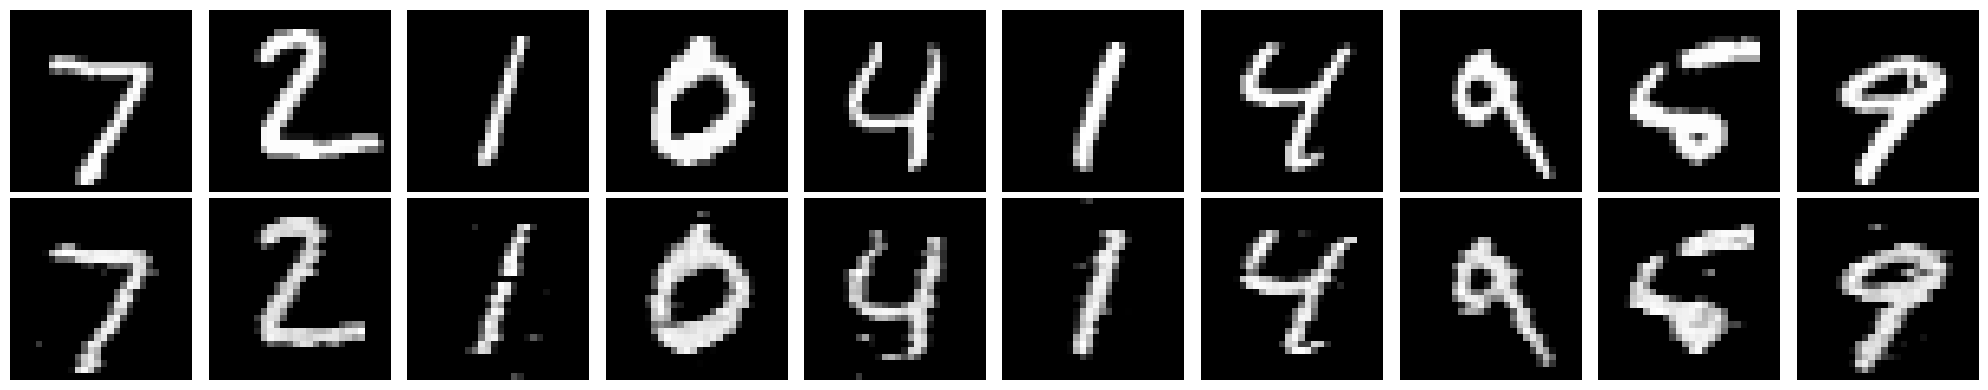

In [ ]:
reconstructed_imgs = autoencoder.predict(X_test_noisy)

plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

**Question**

The contructed data looks very similar to the original data. There are some random gray pixels that are around most of the constructed data pictures and some of the numbers have slices through them, but besides that, the original and contructed data looks almost the same.